In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

/Users/cornelius15/anaconda2/envs/deeplearning/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
'''
Dataset de ejemplo para clasificacion binaria
'''
from sklearn.datasets import make_blobs

dataset = make_blobs(n_samples = 100, n_features=2, centers=2, cluster_std=4.0)
x = dataset[0]
y = dataset[1]

nx,m = x.T.shape

colors = ['red' if label == 1 else 'blue' for label in y]

In [3]:
print colors

['blue', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'red', 'red', 'red', 'red', 'red', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red']


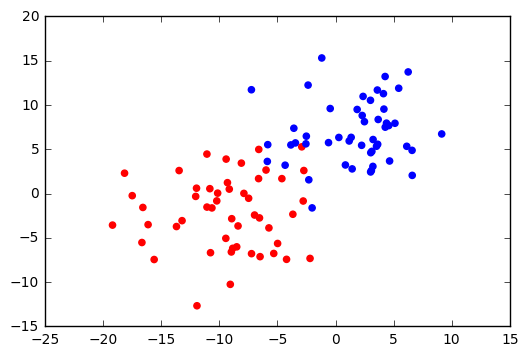

In [4]:
plt.scatter(x[:,0], x[:,1], color=colors)
plt.show()

In [5]:
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [6]:
reset_graph()

#dataset en forma de tensores
X = tf.constant(x.T, dtype=tf.float32, name="X")
Y = tf.constant(y, dtype=tf.float32, name="Y")

#parametros del regresor logistico: W y b
W = tf.Variable(tf.zeros([1, nx]), name="W", dtype=tf.float32)
b = tf.Variable(tf.zeros([1,1]), name="b", dtype=tf.float32)

#parametros de entrenamiento
learning_rate = 0.01
n_epochs = 10000

'''
Grafo de computo
'''
#1. feed-forward...propagacion hacia adelante
z = tf.matmul(W,X) + b
a = 1.0 / (1.0 + tf.exp(-z))

#2. calculo del error y el costo
error = -(Y*tf.log(a)+(1-Y)*tf.log(1-a))
J = tf.reduce_mean(error)
#3. derivadas
dz = a - Y
dw = tf.matmul(dz, tf.transpose(X)) / m
db = tf.reduce_sum(dz) / m

#4. actualizacion de parametros W y b
training_W = tf.assign(W, W - learning_rate*dw)
training_b = tf.assign(b, b - learning_rate*db)

In [7]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    print sess.run(W)

[[ 0.  0.]]


In [8]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if(epoch % 1000 == 0):
            print ("Epoca ", epoch, "Error: ", J.eval())
        
        sess.run([training_W, training_b])
        
        best_W = W.eval()
        best_b = b.eval()

    print best_W
    print best_b

('Epoca ', 0, 'Error: ', 0.69314742)
('Epoca ', 1000, 'Error: ', 0.10735015)
('Epoca ', 2000, 'Error: ', 0.10627518)
('Epoca ', 3000, 'Error: ', 0.10546947)
('Epoca ', 4000, 'Error: ', 0.10476312)
('Epoca ', 5000, 'Error: ', 0.10414119)
('Epoca ', 6000, 'Error: ', 0.10359365)
('Epoca ', 7000, 'Error: ', 0.10311158)
('Epoca ', 8000, 'Error: ', 0.10268705)
('Epoca ', 9000, 'Error: ', 0.10231305)
[[-0.63614494 -0.5956499 ]]
[[-0.79999059]]


In [123]:
print best_W
print best_b

[[-0.28270099 -0.63923037]]
[[-2.49126291]]


In [124]:
'''
Evaluemos el resultado del entrenamiento
'''
def sigmoid(z):
    return 1 / 1 + np.exp(-z)

def hardlim(z):
    if(z > 0):
        return 1
    else:
        return 0

def feed_forward(x,W,b):
    return np.dot(W,x)+b

In [125]:
index = 7
pred = feed_forward(x[index], best_W, best_b)
label = hardlim(pred)

print("Predicted label: ", label, "Real label: ", y[index])

('Predicted label: ', 1, 'Real label: ', 1)


<hr>
## Regresion logistica utilizando funciones de TF

In [126]:
reset_graph()

#dataset en forma de tensores
X = tf.constant(x.T, dtype=tf.float32, name="X")
Y = tf.constant(y, dtype=tf.float32, name="Y")

#parametros del regresor logistico: W y b
W = tf.Variable(tf.zeros([1, nx]), name="W")
b = tf.Variable(tf.zeros([1,1]), name="b")

#parametros de entrenamiento
learning_rate = 0.01
n_epochs = 10000

'''
Grafo de computo
'''
#1. feed-forward...propagacion hacia adelante
a = tf.nn.sigmoid(tf.matmul(W, X)+b)

#2. calculo del costo
error = -(Y*tf.log(a)+(1-Y)*tf.log(1-a))
J = tf.reduce_mean(error)

#3. optimizador
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(J)

In [127]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        if(epoch % 1000 == 0):
            print ("Epoca ", epoch, "Error: ", J.eval())
            
        sess.run(optimizer)
        
        best_W = W.eval()
        best_b = b.eval()
    
    print best_W, best_b

('Epoca ', 0, 'Error: ', 0.69314712)
('Epoca ', 1000, 'Error: ', 0.20850205)
('Epoca ', 2000, 'Error: ', 0.18949197)
('Epoca ', 3000, 'Error: ', 0.17831247)
('Epoca ', 4000, 'Error: ', 0.17134641)
('Epoca ', 5000, 'Error: ', 0.1667807)
('Epoca ', 6000, 'Error: ', 0.1636624)
('Epoca ', 7000, 'Error: ', 0.16146185)
('Epoca ', 8000, 'Error: ', 0.15986694)
('Epoca ', 9000, 'Error: ', 0.15868589)
[[-0.28270096 -0.63923037]] [[-2.49126267]]
